# DATA MUNGING

In [96]:
#Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

#Import CSV files
demographic_csv = pd.read_csv('CSVs/demographic.csv', encoding='UTF-8')
diet_csv = pd.read_csv('CSVs/demographic.csv', encoding='UTF-8')
examination_csv = pd.read_csv('CSVs/examination.csv', encoding='UTF-8')
labs_csv = pd.read_csv('CSVs/labs.csv', encoding='UTF-8')
medications_csv = pd.read_csv('CSVs/medications.csv', encoding='UTF-8')
questionnaire_csv = pd.read_csv('CSVs/questionnaire.csv', encoding='UTF-8')

#Convert to DataFrames
demographic_df = pd.DataFrame(demographic_csv)
diet_df = pd.DataFrame(diet_csv)
examination_df = pd.DataFrame(examination_csv)
labs_df = pd.DataFrame(labs_csv)
medications_df = pd.DataFrame(medications_csv)
questionnaire_df = pd.DataFrame(questionnaire_csv)

## Demographics

In [77]:
demographic_clean = demographic_df[['SEQN', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
                                    'RIDRETH3', 'DMDBORN4', 'DMDEDUC2', 'INDFMIN2']]
demographic_clean = demographic_clean.rename(columns={'SEQN': 'Sequence',
                                                     'RIDSTATR': 'Interview Status',
                                                     'RIAGENDR': 'Gender',
                                                     'RIDAGEYR': 'Age, Years',
                                                     'RIDAGEMN': 'Age, Months, Infant',
                                                     'RIDRETH3': 'Ethnicity',
                                                     'DMDBORN4': 'Country of Birth',
                                                     'DMDEDUC2': 'Adult Education Level',
                                                     'INDFMIN2': 'Annual Family Income'})

In [78]:
demographic_clean.head()

,Sequence,Interview Status,Gender,"Age, Years","Age, Months, Infant",Ethnicity,Country of Birth,Adult Education Level,Annual Family Income
0,73557,2,1,69,NaN,4,1,3.0,4.0
1,73558,2,1,54,NaN,3,1,3.0,7.0
2,73559,2,1,72,NaN,3,1,4.0,10.0
3,73560,2,1,9,NaN,3,1,NaN,9.0
4,73561,2,2,73,NaN,3,1,5.0,15.0


In [79]:
mexican_american = []
other_hispanic = []
white = []
black = []
asian = []
other_race = []
missing = []

for row in demographic_clean.itertuples():
    #Mexican-American
    if demographic_clean.at[row.Index, 'Ethnicity'] == 1:
        mexican_american.append(1)
        other_hispanic.append(0)
        white.append(0)
        black.append(0)
        asian.append(0)
        other_race.append(0)
        missing.append(0)
    #Other Hispanic
    elif demographic_clean.at[row.Index, 'Ethnicity'] == 2:
        mexican_american.append(0)
        other_hispanic.append(1)
        white.append(0)
        black.append(0)
        asian.append(0)
        other_race.append(0)
        missing.append(0)
    #White
    elif demographic_clean.at[row.Index, 'Ethnicity'] == 3:
        mexican_american.append(0)
        other_hispanic.append(0)
        white.append(1)
        black.append(0)
        asian.append(0)
        other_race.append(0)
        missing.append(0)
    #Black
    elif demographic_clean.at[row.Index, 'Ethnicity'] == 4:
        mexican_american.append(0)
        other_hispanic.append(0)
        white.append(0)
        black.append(1)
        asian.append(0)
        other_race.append(0)
        missing.append(0)
    #Asian
    elif demographic_clean.at[row.Index, 'Ethnicity'] == 6:
        mexican_american.append(0)
        other_hispanic.append(0)
        white.append(0)
        black.append(0)
        asian.append(1)
        other_race.append(0)
        missing.append(0)
    #Other / Multi-Racial
    elif demographic_clean.at[row.Index, 'Ethnicity'] == 7:
        mexican_american.append(0)
        other_hispanic.append(0)
        white.append(0)
        black.append(0)
        asian.append(0)
        other_race.append(1)
        missing.append(0)
    #Missing
    else:
        mexican_american.append(0)
        other_hispanic.append(0)
        white.append(0)
        black.append(0)
        asian.append(0)
        other_race.append(0)
        missing.append(1)

demographic_clean['Mexican American'] = mexican_american
demographic_clean['Other Hispanic'] = other_hispanic
demographic_clean['White'] = white
demographic_clean['Black'] = black
demographic_clean['Asian'] = asian
demographic_clean['Other Race / Multi-Racial'] = other_race
demographic_clean.head()

,Sequence,Interview Status,Gender,"Age, Years","Age, Months, Infant",Ethnicity,Country of Birth,Adult Education Level,Annual Family Income,Mexican American,Other Hispanic,White,Black,Asian,Other Race / Multi-Racial
0,73557,2,1,69,NaN,4,1,3.0,4.0,0,0,0,1,0,0
1,73558,2,1,54,NaN,3,1,3.0,7.0,0,0,1,0,0,0
2,73559,2,1,72,NaN,3,1,4.0,10.0,0,0,1,0,0,0
3,73560,2,1,9,NaN,3,1,NaN,9.0,0,0,1,0,0,0
4,73561,2,2,73,NaN,3,1,5.0,15.0,0,0,1,0,0,0


## Lab Results

In [80]:
labs_df

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.89020,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.00650,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1
5,73562,123.0,123.0,74.0,6541.6,166.22,NaN,NaN,NaN,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0,553.5
6,73563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,19.0,19.0,242.0,21392.8,7.85,134054.10980,77.0,0.77,3.9,...,0.253,0.0,0.115,0.0,0.0309,0.0,NaN,21.28,668.0,493.0
8,73566,1.3,1.3,18.0,1591.2,7.22,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.0,279.0
9,73567,35.0,35.0,215.0,19006.0,16.28,NaN,NaN,NaN,4.0,...,0.148,0.0,0.078,0.0,0.0436,0.0,NaN,6.07,194.0,143.2


In [81]:
#Filter down to lab results that would indicate diabetes, along with basic blood and urine tests
labs_df = labs_df[['SEQN', 'LBXGH', 'LBXTC', 'LBDTCSI', 'LBXIN', 'LBDINSI', 'LBXSAL', 'LBXSATSI',
                  'LBXSASSI', 'LBXSAPSI', 'LBXSBU', 'LBXSCA', 'LBXSCK', 'LBXSCH', 'LBXSC3SI', 'LBXSCR',
                  'LBXSGTSI', 'LBXSGL', 'LBXSIR', 'LBXSKSI', 'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 'LBXSPH',
                  'LBXSTB', 'LBXSTP', 'LBXSTR', 'LBXSUA']]

In [82]:
#Rename columns
labs_df = labs_df.rename(columns={
    'SEQN': 'Sequence',
    'LBXGH': 'Glycohemoglobin (%)',
    'LBXTC': 'Total Cholesterol (mg/dL)',
    'LBDTCSI': 'Total Cholesterol (mmol/L)',
    'LBXIN': 'Insulin (uU/mL)',
    'LBDINSI': 'Insulin (pmol/L)',
    'LBXSAL': 'Albumin (g/dL)',
    'LBXSATSI': 'ALT (IU/L)',
    'LBXSASSI': 'AST (IU/L)',
    'LBXSAPSI': 'Alkaline Phosphatase (IU/L)',
    'LBXSBU': 'Blood Urea Nitrogen (mg/dL)',
    'LBXSCA': 'Total Calcium (mg/dL)',
    'LBXSCK': 'CPK (IU/L)',
    'LBXSCH': 'Cholesterol (mg/dL)',
    'LBXSC3SI': 'Bicarbonate (mmol/L)',
    'LBXSCR': 'Creatinine (mg/dL)',
    'LBXSGTSI': 'Gamma glutamyl transferase (IU/L)',
    'LBXSGL': 'Glucose, serum (mg/dL)',
    'LBXSIR': 'Iron, refrigerated (ug/dL)',
    'LBXSKSI': 'Potassium (mmol/L)',
    'LBXSLDSI': 'Lactate Dehydrogenase (U/L)',
    'LBXSNASI': 'Sodium (mmol/L)',
    'LBXSOSSI': 'Osmalality (mmol/Kg)',
    'LBXSPH': 'Phosphorus (mg/dL)',
    'LBXSTB': 'Total Bilirubin (mg/dL)',
    'LBXSTP': 'Total Protein (g/dL)',
    'LBXSTR': 'Triglycerides, refrigerated (mg/dL)',
    'LBXSUA': 'Uric Acid (mg/dL)'
})

In [83]:
#Remove any participants that didn't take all of the tests
labs_df = labs_df.dropna()

In [84]:
labs_df

,Sequence,Glycohemoglobin (%),Total Cholesterol (mg/dL),Total Cholesterol (mmol/L),Insulin (uU/mL),Insulin (pmol/L),Albumin (g/dL),ALT (IU/L),AST (IU/L),Alkaline Phosphatase (IU/L),...,"Iron, refrigerated (ug/dL)",Potassium (mmol/L),Lactate Dehydrogenase (U/L),Sodium (mmol/L),Osmalality (mmol/Kg),Phosphorus (mg/dL),Total Bilirubin (mg/dL),Total Protein (g/dL),"Triglycerides, refrigerated (mg/dL)",Uric Acid (mg/dL)
2,73559,8.9,126.0,3.26,5.83,34.98,3.7,16.0,22.0,99.0,...,98.0,4.2,134.0,142.0,288.0,4.2,0.6,5.9,51.0,5.7
4,73561,4.9,201.0,5.20,6.12,36.72,4.3,28.0,36.0,78.0,...,91.0,4.1,201.0,142.0,290.0,4.4,0.5,7.1,88.0,4.2
7,73564,5.5,168.0,4.34,14.91,89.46,3.9,21.0,20.0,72.0,...,71.0,3.9,133.0,140.0,281.0,3.6,0.6,6.4,68.0,5.1
10,73568,5.2,168.0,4.34,3.85,23.10,4.5,23.0,20.0,65.0,...,82.0,4.0,132.0,139.0,276.0,4.6,0.6,7.0,31.0,4.5
15,73574,5.0,131.0,3.39,6.05,36.30,4.3,20.0,20.0,35.0,...,38.0,4.3,120.0,139.0,276.0,2.7,0.9,7.2,23.0,2.7
17,73576,5.1,154.0,3.98,6.14,36.84,5.1,15.0,25.0,110.0,...,49.0,4.7,135.0,143.0,285.0,4.1,0.4,7.2,49.0,5.4
18,73577,5.3,182.0,4.71,16.15,96.90,4.5,44.0,30.0,76.0,...,77.0,3.9,114.0,139.0,279.0,2.8,0.7,7.4,151.0,6.1
21,73580,5.8,225.0,5.82,10.92,65.52,3.8,13.0,17.0,52.0,...,96.0,3.5,124.0,140.0,278.0,3.9,0.5,6.7,64.0,4.3
22,73581,5.0,202.0,5.22,6.08,36.48,4.3,20.0,26.0,60.0,...,126.0,4.0,138.0,139.0,277.0,3.5,0.5,7.4,107.0,5.3
28,73587,5.7,159.0,4.11,21.11,126.66,4.5,53.0,37.0,129.0,...,87.0,3.9,132.0,139.0,278.0,4.4,1.0,7.0,83.0,7.1


In [85]:
corr = labs_df.corr()

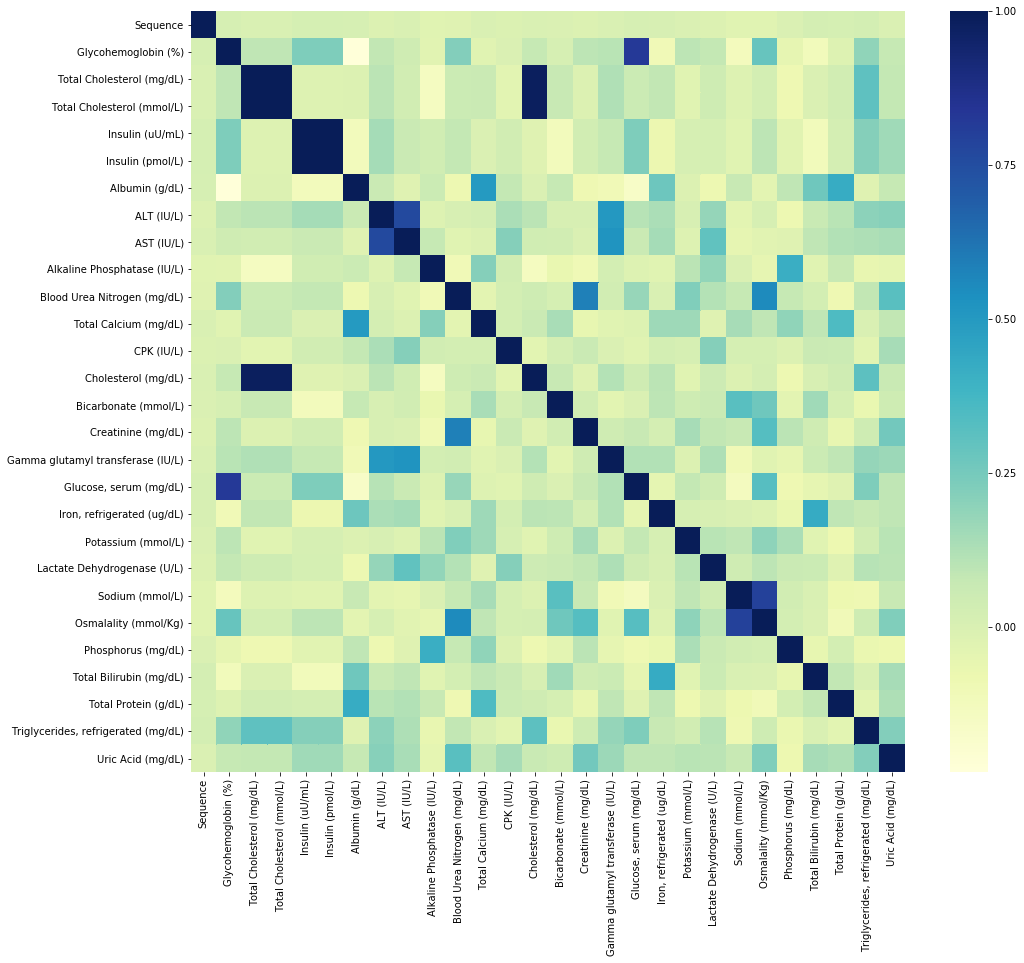

In [86]:
plt.figure(figsize=(16, 14))
sns.heatmap(labs_df.corr(), cmap='YlGnBu')
plt.savefig('Lab Results Heatmap Test.png')
plt.show()

In [87]:
#Merge dataframes
demo_lab_df = pd.merge(demographic_clean, labs_df, how='inner', on='Sequence')

In [88]:
demo_lab_df

,Sequence,Interview Status,Gender,"Age, Years","Age, Months, Infant",Ethnicity,Country of Birth,Adult Education Level,Annual Family Income,Mexican American,...,"Iron, refrigerated (ug/dL)",Potassium (mmol/L),Lactate Dehydrogenase (U/L),Sodium (mmol/L),Osmalality (mmol/Kg),Phosphorus (mg/dL),Total Bilirubin (mg/dL),Total Protein (g/dL),"Triglycerides, refrigerated (mg/dL)",Uric Acid (mg/dL)
0,73559,2,1,72,NaN,3,1,4.0,10.0,0,...,98.0,4.2,134.0,142.0,288.0,4.2,0.6,5.9,51.0,5.7
1,73561,2,2,73,NaN,3,1,5.0,15.0,0,...,91.0,4.1,201.0,142.0,290.0,4.4,0.5,7.1,88.0,4.2
2,73564,2,2,61,NaN,3,1,5.0,10.0,0,...,71.0,3.9,133.0,140.0,281.0,3.6,0.6,6.4,68.0,5.1
3,73568,2,2,26,NaN,3,1,5.0,15.0,0,...,82.0,4.0,132.0,139.0,276.0,4.6,0.6,7.0,31.0,4.5
4,73574,2,2,33,NaN,6,2,5.0,8.0,0,...,38.0,4.3,120.0,139.0,276.0,2.7,0.9,7.2,23.0,2.7
5,73576,2,1,16,NaN,4,1,NaN,8.0,0,...,49.0,4.7,135.0,143.0,285.0,4.1,0.4,7.2,49.0,5.4
6,73577,2,1,32,NaN,1,2,1.0,2.0,1,...,77.0,3.9,114.0,139.0,279.0,2.8,0.7,7.4,151.0,6.1
7,73580,2,2,38,NaN,4,1,3.0,12.0,0,...,96.0,3.5,124.0,140.0,278.0,3.9,0.5,6.7,64.0,4.3
8,73581,2,1,50,NaN,6,2,5.0,15.0,0,...,126.0,4.0,138.0,139.0,277.0,3.5,0.5,7.4,107.0,5.3
9,73587,2,1,14,NaN,6,1,NaN,15.0,0,...,87.0,3.9,132.0,139.0,278.0,4.4,1.0,7.0,83.0,7.1


In [89]:
corr = demo_lab_df.corr()


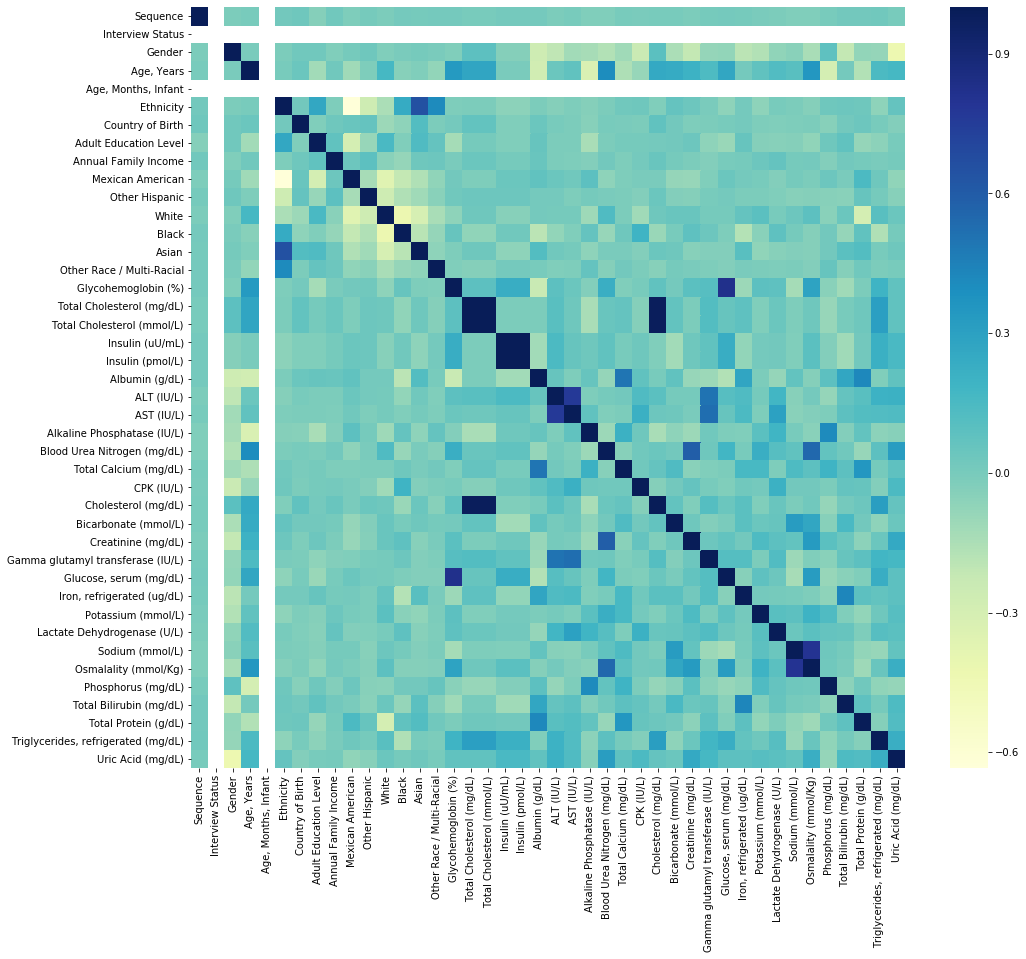

In [90]:
plt.figure(figsize=(16, 14))
sns.heatmap(demo_lab_df.corr(), cmap='YlGnBu')
plt.show()

In [100]:
diabetes_demo_df = demo_lab_df.loc[demo_lab_df['Glycohemoglobin (%)'] > 6.5]

In [101]:
ttest_ind(diabetes_demo_df['Glycohemoglobin (%)'], diabetes_demo_df['Black'], equal_var=False)

Ttest_indResult(statistic=70.03235455013933, pvalue=7.384269351745476e-179)

In [ ]:
numbers_df['']

KeyError: 'Age, Months, Child'